In [49]:
import requests
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'addb8021fa254533836ce264dc6cbd61' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [30]:
def is_none(obj):
    if obj is None:
        return 0
    else:
        return obj

In [4]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [37]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    marketvalue = team['squadMarketValue']
    losses = 0
    if fixtures != []:
        for f in fixtures:
            if team['name'] == f['homeTeamName']:
                losses += 1 if is_none(f['result']['goalsAwayTeam']) > is_none(f['result']['goalsHomeTeam']) else 0
            else:
                losses += 1 if is_none(f['result']['goalsHomeTeam']) > is_none(f['result']['goalsAwayTeam']) else 0
        print('Team "{}", marketvalue {}, {} losses'.format(team['name'], marketvalue, losses))
        team['marketvalue'] = marketvalue
        team['losses'] = losses

Team "FC Rio Ave", marketvalue None, 9 losses
Team "FC Porto", marketvalue None, 3 losses
Team "Moreirense FC", marketvalue None, 12 losses
Team "FC Paços de Ferreira", marketvalue None, 13 losses
Team "Sporting CP", marketvalue None, 4 losses
Team "Maritimo Funchal", marketvalue None, 9 losses
Team "CD Tondela", marketvalue None, 12 losses
Team "SL Benfica", marketvalue None, 7 losses
Team "Boavista Porto FC", marketvalue None, 11 losses
Team "Vitoria Setubal", marketvalue None, 11 losses
Team "C.F. Os Belenenses", marketvalue None, 11 losses
Team "Vitoria Guimaraes", marketvalue None, 13 losses
Team "Sporting Braga", marketvalue None, 6 losses
Team "GD Estoril Praia", marketvalue None, 15 losses
Team "Feirense", marketvalue None, 16 losses
Team "G.D. Chaves", marketvalue None, 8 losses


In [62]:
team_for_pd = []
for team in teams:
    if team['marketvalue'] is None: 
        marketvalue = random.randint(5,100)
    else: 
        marketvalue = team['marketvalue']
    team_for_pd.append({'name': team['name'], 'marketvalue': marketvalue, 'losses': team['losses']})
team_for_pd

[{'losses': 9, 'marketvalue': 86, 'name': 'FC Rio Ave'},
 {'losses': 3, 'marketvalue': 81, 'name': 'FC Porto'},
 {'losses': 12, 'marketvalue': 13, 'name': 'Moreirense FC'},
 {'losses': 13, 'marketvalue': 70, 'name': 'FC Paços de Ferreira'},
 {'losses': 4, 'marketvalue': 85, 'name': 'Sporting CP'},
 {'losses': 9, 'marketvalue': 29, 'name': 'Maritimo Funchal'},
 {'losses': 12, 'marketvalue': 88, 'name': 'CD Tondela'},
 {'losses': 7, 'marketvalue': 61, 'name': 'SL Benfica'},
 {'losses': 11, 'marketvalue': 42, 'name': 'Boavista Porto FC'},
 {'losses': 0, 'marketvalue': 40, 'name': 'FC Arouca'},
 {'losses': 11, 'marketvalue': 75, 'name': 'Vitoria Setubal'},
 {'losses': 11, 'marketvalue': 95, 'name': 'C.F. Os Belenenses'},
 {'losses': 13, 'marketvalue': 12, 'name': 'Vitoria Guimaraes'},
 {'losses': 6, 'marketvalue': 80, 'name': 'Sporting Braga'},
 {'losses': 15, 'marketvalue': 64, 'name': 'GD Estoril Praia'},
 {'losses': 16, 'marketvalue': 89, 'name': 'Feirense'},
 {'losses': 0, 'marketvalue

In [63]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,losses,marketvalue,name
0,9,86,FC Rio Ave
1,3,81,FC Porto
2,12,13,Moreirense FC
3,13,70,FC Paços de Ferreira
4,4,85,Sporting CP
5,9,29,Maritimo Funchal
6,12,88,CD Tondela
7,7,61,SL Benfica
8,11,42,Boavista Porto FC
9,0,40,FC Arouca


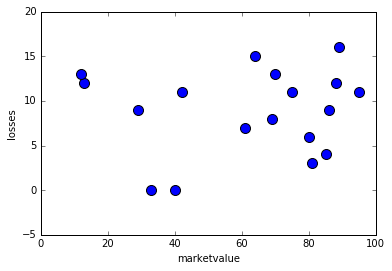

In [64]:
teams_pd.plot.scatter(x='marketvalue', y='losses', s=100)

In [65]:
del teams_pd['name']
teams_pd

,losses,marketvalue
0,9,86
1,3,81
2,12,13
3,13,70
4,4,85
5,9,29
6,12,88
7,7,61
8,11,42
9,0,40


In [66]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 1.94912122,  3.29188882],
       [ 0.64970707,  3.10049994],
       [ 2.5988283 ,  0.4976111 ],
       [ 2.81539732,  2.67944439],
       [ 0.8662761 ,  3.25361105],
       [ 1.94912122,  1.11005553],
       [ 2.5988283 ,  3.36844438],
       [ 1.51598317,  2.3349444 ],
       [ 2.38225927,  1.60766663],
       [ 0.        ,  1.53111108],
       [ 2.38225927,  2.87083328],
       [ 2.38225927,  3.63638882],
       [ 2.81539732,  0.45933332],
       [ 1.29941415,  3.06222216],
       [ 3.24853537,  2.44977773],
       [ 3.46510439,  3.40672215],
       [ 0.        ,  1.26316664],
       [ 1.7325522 ,  2.64116661]])

In [67]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 0.8662761 ,  2.45524598],
        [ 2.69164359,  3.10049994],
        [ 2.43640153,  0.91866665]]),
 array([1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0]))

In [68]:
colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]

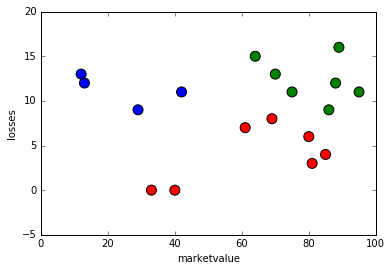

In [69]:
teams_pd.plot.scatter(x='marketvalue', y='losses', c=colors, s=100)

In [70]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 2.43640153,  0.91866665],
        [ 1.21278654,  2.87848883],
        [ 3.1763457 ,  2.84531476],
        [ 2.32811702,  3.29188882],
        [ 0.        ,  1.39713886]]),
 array([3, 1, 0, 2, 1, 0, 3, 1, 0, 4, 3, 3, 0, 1, 2, 2, 4, 1]))

In [71]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

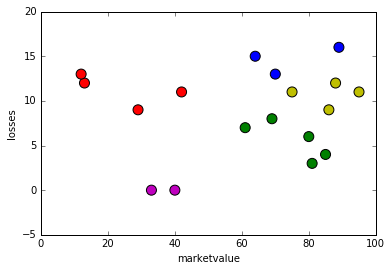

In [72]:
teams_pd.plot.scatter(x='marketvalue', y='losses', c=colors, s=100)